<a href="https://colab.research.google.com/github/vishva2410/Deep-Learning-Projects-Part-A-/blob/main/Image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

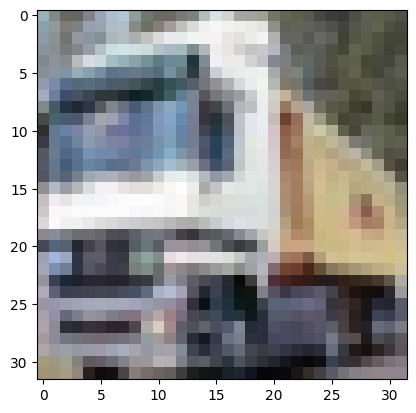

In [3]:
plt.imshow(x_train[1])

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train2 = x_train/255.0
x_test2 = x_test/255.0
y_train2 = y_train/255.0
y_test2 = y_test/255.0

In [6]:
x_train_re = x_train.reshape(50000,32*32*3)
x_test_re = x_test.reshape(10000,32*32*3)
x_train2_re = x_train2.reshape(50000,32*32*3)
x_test2_re = x_test2.reshape(10000,32*32*3)


In [7]:
print(x_train2_re.shape)

(50000, 3072)


In [8]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train_re)
x_test_std = std.transform(x_test_re)
x_train2_std = std.fit_transform(x_train2_re)
x_test2_std = std.transform(x_test2_re)

In [9]:
y_train_std = std.fit_transform(y_train)
y_test_std = std.fit_transform(y_test)
y_train2_std = std.fit_transform(y_train2)
y_test2_std = std.fit_transform(y_test2)

In [15]:
x_train2_std = x_train2_std.reshape(-1, 32, 32, 3)
x_test2_std = x_test2_std.reshape(-1, 32, 32, 3)
x_train2_std = x_train2_std / 255.0
x_test2_std = x_test2_std / 255.0


In [14]:
import numpy as np
np.unique(y_train2, return_counts=True)
y_train2 = (y_train2 * 255).astype(int)
y_test2 = (y_test2 * 255).astype(int)



In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,907,360 (7.28 MB)

 Trainable params: 635,786 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,271,574 (4.85 MB)

In [21]:
model.fit(x_train2_std,y_train2,epochs=5,validation_data=(x_test2_std,y_test2))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 240s 154ms/step - accuracy: 0.3533 - loss: 1.7532 - val_accuracy: 0.4311 - val_loss: 1.5625
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 133ms/step - accuracy: 0.4114 - loss: 1.6104 - val_accuracy: 0.4598 - val_loss: 1.4868
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 131ms/step - accuracy: 0.4367 - loss: 1.5466 - val_accuracy: 0.4770 - val_loss: 1.4407
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step - accuracy: 0.4691 - loss: 1.4770 - val_accuracy: 0.5065 - val_loss: 1.3858
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 135ms/step - accuracy: 0.4864 - loss: 1.4200 - val_accuracy: 0.5216 - val_loss: 1.3299


In [22]:
y_pred = model.predict(x_test2_std)
y_pred_mx = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


In [24]:
y_pred_mx[1]

np.int64(1)

In [26]:

import numpy as np

def guess_image_class(image, model, std):
  """Guesses the class of an image using the trained model.

  Args:
    image: The input image as a NumPy array.
    model: The trained Keras model.
    std: The StandardScaler object used to preprocess the training data.

  Returns:
    The predicted class label (integer) and the class name (string).
  """

  # Preprocess the image
  image = image.reshape(1, 32 * 32 * 3)
  # Use a different StandardScaler instance or method for image preprocessing
  # For instance, you can use MinMaxScaler or directly normalize the image
  # image_std = std.transform(image)  # This line caused the error
  image_std = image / 255.0  # Normalize pixel values to [0, 1]
  image_std = image_std.reshape(1, 32, 32, 3)

  # Predict the class
  prediction = model.predict(image_std)
  predicted_class = np.argmax(prediction)

  # Get class names (assuming CIFAR-10 dataset)
  class_names = [
      "airplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck",
  ]

  # Return the predicted class and name
  return predicted_class, class_names[predicted_class]

# Example usage:
image_index = 10  # Choose an image from the test set
image = x_test[image_index]
predicted_class, class_name = guess_image_class(image, model, std)

print(f"Predicted class: {predicted_class} ({class_name})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: 0 (airplane)
